In [1]:
import collections

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

%matplotlib inline

In [2]:
# High-throughput
rolland_df = pd.read_table('http://interactome.baderlab.org/data/Rolland-Vidal(Cell_2014).psi')

ht_protein_to_degree = (
    collections.Counter(rolland_df['Unique identifier for interactor A'])
    + collections.Counter(rolland_df['Unique identifier for interactor B'])
)
ht_protein_to_degree.pop('-');

# Literature-curated
litbm_df = pd.read_table('http://interactome.baderlab.org/data/LitBM-17.psi', header=None)

lit_protein_to_degree = (collections.Counter(litbm_df[0]) + collections.Counter(litbm_df[1]))

In [3]:
lit_degree_df = (pd.DataFrame
    .from_dict(lit_protein_to_degree, orient='index')
    .reset_index()
    .rename(columns={'index': 'protein', 0: 'degree'}))

ht_degree_df = (pd.DataFrame
    .from_dict(ht_protein_to_degree, orient='index')
    .reset_index()
    .rename(columns={'index': 'protein', 0: 'degree'}))

degree_type_df = ht_degree_df.merge(lit_degree_df, on='protein', how='outer', suffixes=('_ht', '_lit')).fillna(0)

degree_type_df.head(2)

,protein,degree_ht,degree_lit
0,uniprotkb:A0A087WUM8,75.0,0.0
1,uniprotkb:A0A087WW76,6.0,0.0


Text(0, 0.5, 'likelihood of occurrence')

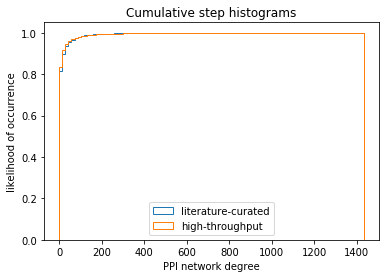

In [4]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(degree_type_df['degree_lit'], label='literature-curated', bins=100,
                           density=True, histtype='step', cumulative=True)
ax.hist(degree_type_df['degree_ht'], label='high-throughput',
        bins=bins, density=True, histtype='step', cumulative=True)

ax.legend(loc='lower center')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('PPI network degree')
ax.set_ylabel('likelihood of occurrence')

Text(0, 0.5, 'log likelihood of occurrence')

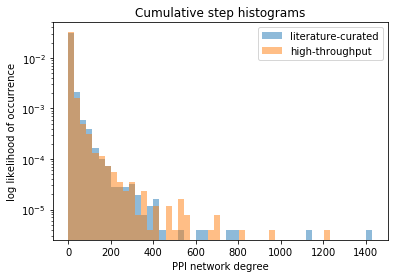

In [5]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(degree_type_df['degree_lit'], label='literature-curated', bins=50,
                           density=True, alpha=0.5, log=True)
ax.hist(degree_type_df['degree_ht'], label='high-throughput',
        bins=bins, density=True, alpha=0.5)

ax.legend(loc='best')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('PPI network degree')
ax.set_ylabel('log likelihood of occurrence')

In [6]:
scipy.stats.wilcoxon(degree_type_df['degree_ht'].values, degree_type_df['degree_lit'].values, zero_method='pratt')

WilcoxonResult(statistic=18094694.0, pvalue=4.193202806957258e-08)